In [1]:
import os
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
plt.rc("figure", dpi=100)
SMALL_SIZE = 10
BIGGER_SIZE = 10
plt.rc('font', size=BIGGER_SIZE)
plt.rc('axes', titlesize=BIGGER_SIZE)
plt.rc('axes', labelsize=BIGGER_SIZE)
plt.rc('axes', linewidth=.6)
plt.rc('xtick', labelsize=BIGGER_SIZE)
plt.rc('ytick', labelsize=BIGGER_SIZE)
plt.rc('legend', fontsize=SMALL_SIZE)
plt.rc('figure', titlesize=1)
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.minor.size'] = 5

In [3]:
data_path = Path("./data_pruning_results/")
datasets = os.listdir(data_path)

In [4]:
res_dict = {}
for dataset in datasets:
    res_dict[dataset] = {}
    res_dict[dataset].update({"r2": pd.read_pickle(data_path/dataset/"r2_results.pkl")})
    res_dict[dataset].update({"rmse": pd.read_pickle(data_path/dataset/"rmse_results.pkl")}) 

In [5]:
methods = list(res_dict[dataset]["r2"].keys())

In [6]:
methods

['InfluenceFunction', 'DataShapley', 'Random', 'OOB', 'KNNShapley']

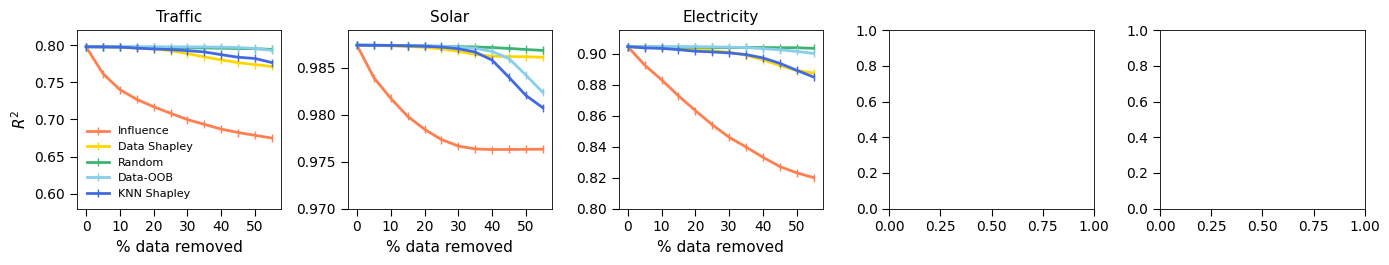

In [34]:
colors = ['coral', 'gold', 'mediumseagreen', 'skyblue', 'royalblue']
# colors = ['tab:purple', 'tab:blue', 'tab:green', 'tab:orange', 'tab:red']
# colors = ['tab:orange', 'skyblue', 'cornflowerblue', 'dodgerblue', 'royalblue']
# colors = ['orange', 'lightgreen', 'yellowgreen', 'limegreen', 'forestgreen']
labels = ['Influence', 'Data Shapley', 'Random', 'Data-OOB', 'KNN Shapley']

fig, axes = plt.subplots(1, 5, figsize=(14, 2.75))

for i, method in enumerate(methods):
    r2 = res_dict['traffic']["r2"][method]["mean"][:12]
    x = np.arange(len(r2))
    std = res_dict['traffic']["r2"][method]["std"][:12]
    # axes[0].errorbar(x, r2, std, color=colors[i], label=labels[i], linewidth=2.)
    axes[0].plot(r2, marker = "|", color=colors[i], label=labels[i], linewidth=2)
    axes[0].set_ylabel(r"$R^2$", fontsize=11)
    axes[0].set_xticks([0, 2, 4, 6, 8, 10], [0, "10", "20", "30", "40", "50"])
    axes[0].set_title("Traffic", fontsize=11)
    axes[0].set_ylim(0.58, 0.82)
    axes[0].set_xlabel("% data removed", fontsize=11)
    axes[0].legend(loc="lower left", frameon=False, fontsize=8)

for i, method in enumerate(methods):
    r2 = res_dict['solar_AL']["r2"][method]["mean"][:12]
    x = np.arange(len(r2))
    std = res_dict['solar_AL']["r2"][method]["std"][:12]
    # axes[1].errorbar(x, r2, std, color=colors[i], linewidth=2)
    axes[1].plot(r2, marker = "|", color=colors[i], label=labels[i], linewidth=2)
    axes[1].set_xticks([0, 2, 4, 6, 8, 10], [0, "10", "20", "30", "40", "50"])
    axes[1].set_title("Solar", fontsize=11)
    axes[1].set_xlabel("% data removed", fontsize=11)
    axes[1].set_ylim(0.97, 0.989)

for i, method in enumerate(methods):
    r2 = res_dict['electricity']["r2"][method]["mean"][:12]
    x = np.arange(len(r2))
    std = res_dict['electricity']["r2"][method]["std"][:12]
    # axes[3].errorbar(x, r2, std, color=colors[i], linewidth=2)
    axes[2].plot(r2, marker = "|", color=colors[i], label=labels[i], linewidth=2)
    axes[2].set_xticks([0, 2, 4, 6, 8, 10], [0, "10", "20", "30", "40", "50"])
    axes[2].set_xlabel("% data removed", fontsize=11)
    axes[2].set_title("Electricity", fontsize=11)
    axes[2].set_ylim(0.8, 0.915)

# for i, method in enumerate(methods):
#     r2 = res_dict['exchange_rate']["r2"][method]["mean"][:12]
#     x = np.arange(len(r2))
#     std = res_dict['exchange_rate']["r2"][method]["std"][:12]
#     # axes[2].errorbar(x, r2, std, color=colors[i], linewidth=2)
#     axes[3].plot(r2, marker = "|", color=colors[i], label=labels[i], linewidth=2)
#     # axes[2].set_ylabel(r"$R^2$", fontsize=12)
#     axes[3].set_xticks([0, 2, 4, 6, 8, 10], [0, "10", "20", "30", "40", "50"])
#     axes[3].set_xlabel("% data removed", fontsize=11)
#     axes[3].set_title("Exchange Rate", fontsize=11)
#     axes[3].set_ylim(0.91, 0.97)
    
plt.tight_layout()
plt.savefig("./plots/data_pruning.png", dpi=300)

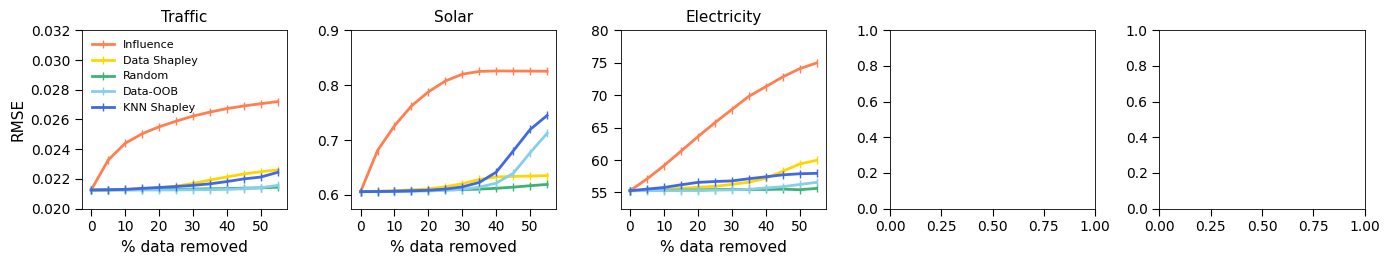

In [23]:
colors = ['coral', 'gold', 'mediumseagreen', 'skyblue', 'royalblue']
# colors = ['tab:purple', 'tab:blue', 'tab:green', 'tab:orange', 'tab:red']
# colors = ['tab:orange', 'skyblue', 'cornflowerblue', 'dodgerblue', 'royalblue']
# colors = ['orange', 'lightgreen', 'yellowgreen', 'limegreen', 'forestgreen']
labels = ['Influence', 'Data Shapley', 'Random', 'Data-OOB', 'KNN Shapley']

fig, axes = plt.subplots(1, 5, figsize=(14, 2.75))

for i, method in enumerate(methods):
    rmse = res_dict['traffic']["rmse"][method]["mean"][:12]
    x = np.arange(len(rmse))
    std = res_dict['traffic']["r2"][method]["std"][:12]
    # axes[0].errorbar(x, r2, std, color=colors[i], label=labels[i], linewidth=2.)
    axes[0].plot(rmse, marker = "|", color=colors[i], label=labels[i], linewidth=2)
    axes[0].set_ylabel("RMSE", fontsize=11)
    axes[0].set_xticks([0, 2, 4, 6, 8, 10], [0, "10", "20", "30", "40", "50"])
    axes[0].set_title("Traffic", fontsize=11)
    axes[0].set_ylim(0.020, 0.032)
    axes[0].set_xlabel("% data removed", fontsize=11)
    axes[0].legend(loc="upper left", frameon=False, fontsize=8)

for i, method in enumerate(methods):
    rmse = res_dict['solar_AL']["rmse"][method]["mean"][:12]
    x = np.arange(len(rmse))
    std = res_dict['solar_AL']["r2"][method]["std"][:12]
    # axes[1].errorbar(x, r2, std, color=colors[i], linewidth=2)
    axes[1].plot(rmse, marker = "|", color=colors[i], label=labels[i], linewidth=2)
    axes[1].set_xticks([0, 2, 4, 6, 8, 10], [0, "10", "20", "30", "40", "50"])
    axes[1].set_title("Solar", fontsize=11)
    axes[1].set_xlabel("% data removed", fontsize=11)
    axes[1].set_ylim(0.575, 0.9)

for i, method in enumerate(methods):
    rmse = res_dict['electricity']["rmse"][method]["mean"][:12]
    x = np.arange(len(rmse))
    std = res_dict['electricity']["r2"][method]["std"][:12]
    # axes[3].errorbar(x, r2, std, color=colors[i], linewidth=2)
    axes[2].plot(rmse, marker = "|", color=colors[i], label=labels[i], linewidth=2)
    axes[2].set_xticks([0, 2, 4, 6, 8, 10], [0, "10", "20", "30", "40", "50"])
    axes[2].set_xlabel("% data removed", fontsize=11)
    axes[2].set_title("Electricity", fontsize=11)
    axes[2].set_ylim(52.5, 80)

# for i, method in enumerate(methods):
#     r2 = res_dict['exchange_rate']["r2"][method]["mean"][:12]
#     x = np.arange(len(r2))
#     std = res_dict['exchange_rate']["r2"][method]["std"][:12]
#     # axes[2].errorbar(x, r2, std, color=colors[i], linewidth=2)
#     axes[3].plot(r2, marker = "|", color=colors[i], label=labels[i], linewidth=2)
#     # axes[2].set_ylabel(r"$R^2$", fontsize=12)
#     axes[3].set_xticks([0, 2, 4, 6, 8, 10], [0, "10", "20", "30", "40", "50"])
#     axes[3].set_xlabel("% data removed", fontsize=11)
#     axes[3].set_title("Exchange Rate", fontsize=11)
#     axes[3].set_ylim(0.91, 0.97)
    
plt.tight_layout()
# plt.savefig("./plots/data_pruning_rmse.png", dpi=300)